<a href="https://colab.research.google.com/github/XiaolingYao/u3272251_ST1A9CapstoneProject/blob/main/u3272251_ST1_A9_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capstone Project (ST1 Assignment 9)
- Student ID: u3272251
- Dataset: Diamonds (Kaggle Dataset)
- Github Repository: https://github.com/XiaolingYao/u3272251_ST1A9CapstoneProject

In [ ]:
## Capstone Project
## Author: u3272251
## Date: 3/May/2024
## Description: This Google Colab report contains the data analysis and prediction model training and selecting, will export .pkl file of cleaned dataset of predictors and final model.
# This report following the template provided by the Unit Convener.

# Citation:
# [1] G. Chetty, "BostonHousPriceProject_Final.ipynb," Unit Convener, Lecturer, Tutor/Demonstrator, University of Canberra, 2024. [Online]. Available: https://uclearn.canberra.edu.au/courses/15583/files/4935151?module_i tem_id=1241192. [Accessed: 2 May 2024].

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/u3272251_ST1_A9_CapstoneProject

/content/drive/MyDrive/ColabNotebooks/u3272251_ST1_A9_CapstoneProject


In [ ]:
!ls /content/drive/MyDrive/ColabNotebooks/u3272251_ST1_A9_CapstoneProject

DataForML.pkl  diamonds.csv  u3272251_ST1_A9_CapstoneProject.ipynb  u3272251XGB.pkl


## This project is based on the Diamond data available from Kaggle repositor (https://www.kaggle.com/datasets/shivam2503/diamonds/data)
- it contains 53940 diamonds informations.
- My project task is to create a machine learning model which can predict the price of the diamond based on its characteristics.
- For solving this problem, I will follow a step by step approach to create a data analysis and prediction model based on machine learning/AI algorithms, regression algorithms available from different Python packages, modules and classes.

# Step 1: Reading the dataset

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
diamondsData=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/u3272251_ST1_A9_CapstoneProject/diamonds.csv', encoding='latin')
print('Shape before deleting duplicate values:', diamondsData.shape)

# Removing duplicate rows if any
diamondsData=diamondsData.drop_duplicates()
print('Shape After deleting duplicate values:', diamondsData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
diamondsData.head(10)


Shape before deleting duplicate values: (53940, 11)
Shape After deleting duplicate values: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Key observations from Step 1 about Data Description
- This file contains 53940 diamonds informations
- There are 10 attributes and they are outlined below:
  (**Unnamed: 0:** Index counter is not attributes)

  - **carat:** weight of the diamond (0.2 - 5.01)
  - **cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
  - **color:** diamond colour (J (worst), I, H, G, F, E, D (best))
  - **clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
  - **depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
  - **table:** width of top of diamond relative to widest point (43--95)
  - **price:** price in US dollars (\$326--\$18,823)
  - **x:** length in mm (0--10.74)
  - **y:** width in mm (0--58.9)
  - **z:** depth in mm (0--31.8)

# Step 2: Problem Statement Definition
- Creating a prediction model to predict the price of a diamond
- Original Target Variable: price
- Potential Predictors/Features: carat, cut, color, clarity, table, depth, x, y, z

Due to the skews, transformations have been applied; therefore, the prediction model will predict the value of boxcox(price), which need to be converted back to price when using the model.

- Target Variable in MLR model: boxcox_price
- Predictors/Features: log_carat, cut, color, clarity, x, y, z

### Choosing the appropriate ML/AI Algorithm for Data Analysis
- Based on the problem statement we need to create a supervised ML/AI Regression model, as the target variable is **continuous**.

# Step 3: Target Variable Identification
The target variable is **price**.

We'll need to further check its distribution to check if we need to modify it with any transformations.

# Step 4: Visualising the Distribution of Target Variable

<Axes: >

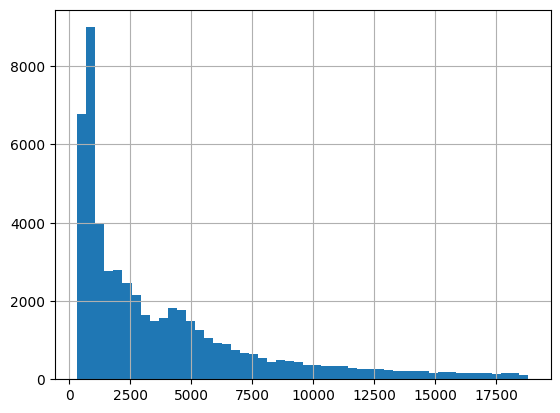

In [ ]:
%matplotlib inline
import math
# Creating histogram as the Target variable is Continuous
diamondsData['price'].hist(bins = 50)

**The histogram is right-skewed.**

Therefore, we need to transfer it to be normalised.

In [ ]:
diamondsData['price'].skew()

1.618395283383529

**The unbiased skew for the orginal data Price is 1.62.**

Try:
- log10(price)
- sqrt(price) (square root)
- and boxcox_price

to reduce the skew.

Unbiased skew for log10(price) is:  0.11529585821714848


<Axes: >

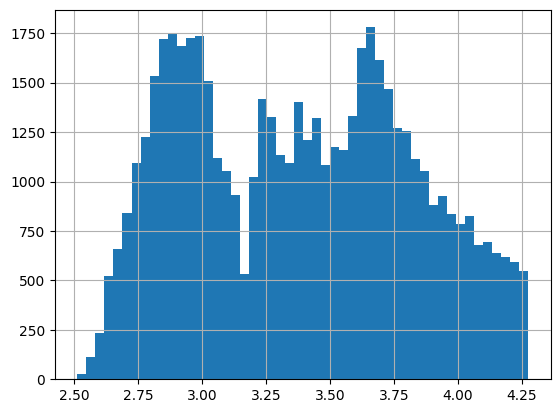

In [ ]:
# Transfrom: log10(price)
logPrice = np.log10(diamondsData['price'])
print("Unbiased skew for log10(price) is: ", logPrice.skew())
logPrice.hist(bins = 50)

Unbiased skew for sqrt(price) is:  0.844395644087981


<Axes: >

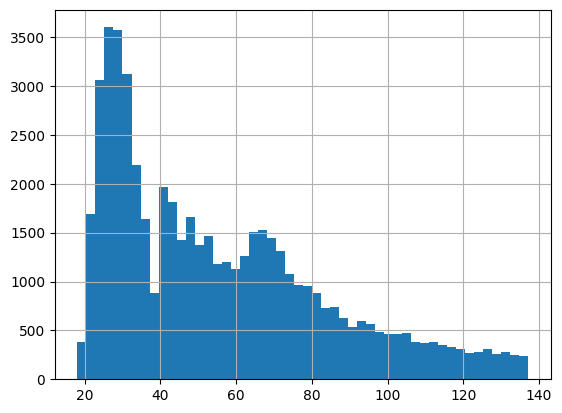

In [ ]:
# Transfrom: sqrt(price)
sqrtPrice = np.sqrt(diamondsData['price'])
print("Unbiased skew for sqrt(price) is: ", sqrtPrice.skew())
sqrtPrice.hist(bins = 50)

Best Lambda:  -0.06699030544539092
Unbiased skew for boxcox_price is:  0.02557750226591505


<Axes: >

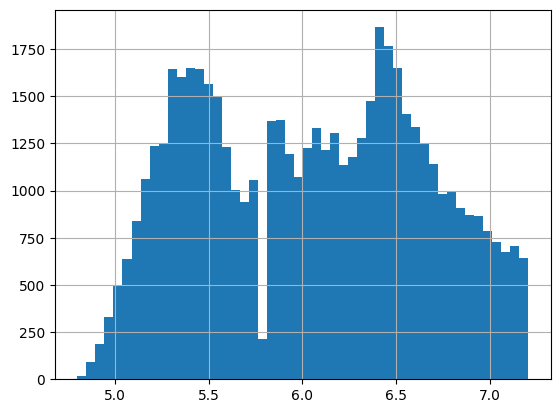

In [ ]:
# Transfrom: boxcox_price
from scipy import stats
boxcoxDiamond, best_lambda = stats.boxcox(diamondsData['price'])
print("Best Lambda: ", best_lambda)

# Convert numpy array to pandas dataframe
boxcoxDiamond = pd.Series(boxcoxDiamond)
print("Unbiased skew for boxcox_price is: ", boxcoxDiamond.skew())
boxcoxDiamond.hist(bins = 50)

### Observations from Step 4

- The data distribution of the original target variable is right skewed, need to be modified.
- Comparing all the histograms and unbiased skews:
  - Orginal Price: 1.62
  - Log10(Price): 0.12
  - sqrt(Price): 0.84
  - boxcox_price: 0.03

  I'd pick boxcox_price with lambda = -0.06699 as the transformed target variable.

  Box-Cox Transformation Equation:

  boxcox_price = (price ** lambda - 1)/lambda

- The data distribution of the transfermed target variable is satisfactory to proceed further.
- There are sufficient number of rows for each type of values to learn from.



# Stap 5: Data Exporatory at Basic Level

Firstly, we add the transfered target variable column boxcox_price into the dataframe.

In [ ]:
diamondsData.insert(8, "boxcox_price", boxcoxDiamond, True)

In [ ]:
# Looking at sample rows in the data (first 5 rows)
diamondsData.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,4.797128,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,4.797128,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.799206,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.813567,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.815592,4.34,4.35,2.75


In [ ]:
# Looking at sample rows in the data (last 5 rows)
diamondsData.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,6.147177,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,6.147177,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,6.147177,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.147177,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,6.147177,5.83,5.87,3.64


In [ ]:
# Observing the summarized information of data
diamondsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    53940 non-null  int64  
 1   carat         53940 non-null  float64
 2   cut           53940 non-null  object 
 3   color         53940 non-null  object 
 4   clarity       53940 non-null  object 
 5   depth         53940 non-null  float64
 6   table         53940 non-null  float64
 7   price         53940 non-null  int64  
 8   boxcox_price  53940 non-null  float64
 9   x             53940 non-null  float64
 10  y             53940 non-null  float64
 11  z             53940 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 4.9+ MB


In [ ]:
# Looking at the descriptive statistics of the data
diamondsData.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
count,53940.000000,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,26970.500000,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,6.046904,5.731157,5.734526,3.538734
std,15571.281097,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,0.601067,1.121761,1.142135,0.705699
min,1.000000,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,4.797128,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,5.497582,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,6.065476,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.525878,6.540000,6.540000,4.040000


In [ ]:
# Finding unique values for each column
# To understand which column is categorical and which one is Continuous
diamondsData.nunique()

Unnamed: 0      53940
carat             273
cut                 5
color               7
clarity             8
depth             184
table             127
price           11602
boxcox_price    11602
x                 554
y                 552
z                 375
dtype: int64

In [ ]:
# According to the variable description: depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# depth and x, y, z are not independent, we'd like to check if they match the description first
numNotClose = 0
indexNotClose = []
print("{:>8}{:>11}{:>14}{:>17}{:>20}".format('index','depth','x','y','z'))
for row in range(len(diamondsData['depth'])):
  if not math.isclose(diamondsData['depth'][row], round(2 * diamondsData['z'][row] / (diamondsData['x'][row] + diamondsData['y'][row] ) * 100, 1), abs_tol = 1):
    numNotClose += 1
    indexNotClose.append(row)
    # In case the total not match rows are too many, print only the first 20 as sample to overlook the reasons of not match
    if numNotClose <= 20:
      print("{:>8}{:>11}{:>14}{:>17}{:>20}".format(row, diamondsData['depth'][row], diamondsData['x'][row], diamondsData['y'][row], diamondsData['z'][row]))

# Print the key indicators of this analysis step
print("Total amount of not match rows: ", numNotClose)
print("Presentage of not match rows: {:%}".format(numNotClose/len(diamondsData['depth'])))


   index      depth             x                y                   z
    2207       59.1          6.55             6.48                 0.0
    2274       62.6          6.79             4.24                3.76
    2314       58.1          6.66              6.6                 0.0
    2349       62.7          5.65              5.7                3.65
    2941       62.8          6.26             6.19                3.19
    3511       62.9          5.66             5.59                 3.4
    4124       64.6          6.19             6.25                 4.2
    4518       43.0          6.32             6.27                3.97
    4687       61.5          5.99             5.94                3.97
    4791       63.0           6.5             6.47                 0.0
    5471       59.2           6.5             6.47                 0.0
    6158       62.6          6.27              6.3                3.81
    6341       44.0          6.31             6.24                4.12
    68

In [ ]:
# As we observed some 0.0 above, we'd like to count the 0.0 in x, y, z which indicated missing values as well
print('Number of 0.0 in column x: ' + str(diamondsData['x'].value_counts()[0.0]))
print('Number of 0.0 in column y: ' + str(diamondsData['y'].value_counts()[0.0]))
print('Number of 0.0 in column z: ' + str(diamondsData['z'].value_counts()[0.0]))

Number of 0.0 in column x: 8
Number of 0.0 in column y: 7
Number of 0.0 in column z: 20


### Observations from Step 5 - Basic Exploratory Data Analysis
- Based on the basic exploration above, three qualitative variables are found:
  - cut
  - color
  - clarity

  All the other variables are quantitative.
- There is no variables need to be removed becaused of missing values based on number of non-null. (For measurement data x, y, and z, 0.0 means missing data as well; however, they are just few.)
- All the quantitative variables are continuous (number of unique values are >20):
  - carat
  - depth
  - table
  - x
  - y
  - z
  - price (Original Target Variable)
  - boxcox_price (Transfermed Target Variable)
- Unnamed: 0 is the index column
- We found only 92 rows of diamonds data with depth and x, y, z might contain different information, it took only 0.17% of the total data. As we obversed the sample of this not matching rows, we noticed some 0.0 in x, y, z, which might indicate missing data (zero in measurement should not appear in the diamond's size), and some not close calculation results.

  Therefore, we need further analysis for these columns to choose the predictors.

- For now, the predictors we'd consider here:
  - cut (qualitative, need to be modified)
  - color (qualitative, need to be modified)
  - clarity (qualitative, need to be modified)
  - carat (continuous, selected)
  - depth (continuous, selected)
  - table (continuous, selected)
  - x (continuous, selected)
  - y (continuous, selected)
  - z (continuous, selected)
- The target variable: boxcox_price (continuous, selected, transfermed target variable)

# Step 6: Identifying and Rejecting Useless Columns

## Modify Transferable Qualitative Columns
Based on the findings in step 5, we noticed three qualitative variables:
- cut (unique: 5)
- color (unique: 7)
- clarity (unique: 8)

Considered the description of these variables:
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour (J (worst), I, H, G, F, E, D (best))
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

We recognised that these variables might describe the important features of the diamond; therefore, we don't want to directly remove these columns for now. Since they are all ordered object data, we can easily convert them into ordinal categorical data with int:
- cut: quality of the cut (Fair: 1, Good: 2, Very Good: 3, Premium: 4, Ideal: 5)
- color: diamond colour (J (worst): 1, I: 2, H: 3, G: 4, F: 5, E: 6, D (best): 7)
- clarity: a measurement of how clear the diamond is (I1 (worst): 1, SI2: 2, SI1: 3, VS2: 4, VS1: 5, VVS2: 6, VVS1: 7, IF (best): 8)

In [ ]:
print("cut - unique values (not ordered):", diamondsData['cut'].unique())
print("color - unique values (not ordered):", diamondsData['color'].unique())
print("clarity - unique values (not ordered):", diamondsData['clarity'].unique())
diamondsData['cut'].replace({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}, inplace = True)
diamondsData['color'].replace({'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D':7}, inplace = True)
diamondsData['clarity'].replace({'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}, inplace = True)
diamondsData.head()

cut - unique values (not ordered): ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color - unique values (not ordered): ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity - unique values (not ordered): ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,4.797128,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,4.797128,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.799206,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.813567,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.815592,4.34,4.35,2.75


Therefore, The predictors we selected:
  - cut (categorical, selected)
  - color (categorical, selected)
  - clarity (categorical, selected)
  - carat (continuous, selected)
  - depth (continuous, selected)
  - table (continuous, selected)
  - x (continuous, selected)
  - y (continuous, selected)
  - z (continuous, selected)

The target variable:
  - boxcox_price (continuous, selected transfermed target variable)

## Removing Unwanted Columns
- We'll remove the index column Unnamed: 0 because it is not related to the prediction.
- We don't need to remove any column because of missing data.
- Since we converted cut, color, and clarity into ordinal categorical, we won't remove them.
- We'll need further analysis on the shape related variables: depth, table, x, y, z, and cut.
- We'll keep price in the dataframe for checking, but won't use it as our target variable because it's right-skewd. Instead, we'll use boxcox_price as the target variable for the ML Regression model.

In [ ]:
# Remove the columns mentioned above
diamondsData.drop(columns = ['Unnamed: 0'], inplace = True)
diamondsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   cut           53940 non-null  int64  
 2   color         53940 non-null  int64  
 3   clarity       53940 non-null  int64  
 4   depth         53940 non-null  float64
 5   table         53940 non-null  float64
 6   price         53940 non-null  int64  
 7   boxcox_price  53940 non-null  float64
 8   x             53940 non-null  float64
 9   y             53940 non-null  float64
 10  z             53940 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.5 MB


# Step 7: Vaisual Exploratory Data Analysis

## Visualize Distribution of All the Categorical Predictor variables in the Data Using Barcharts
Visualize distribution of all the Categorical Predictor variables in the data using bar plots.

Based on the Basic Exploration Data Analysis in the previous step, we could spotted three categorical predictors in the data
Categorical Predictors:
- 'cut'
- 'color'
- 'clarity'

We will use bar charts to see how the data is distributed for these categorical columns.

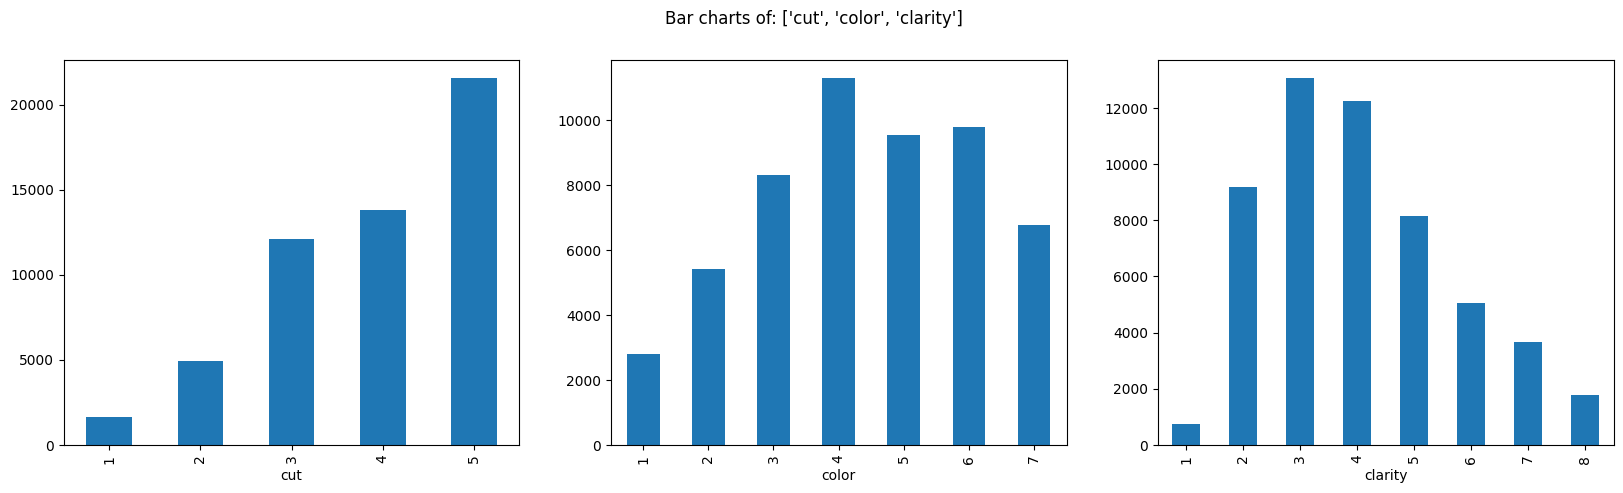

In [ ]:
# Plotting multiple bar charts at once for categorical variables
def PlotBarCharts(inpData, colsToPlot):
  %matplotlib inline
  import matplotlib.pyplot as plt
  # Generating multiple subplots
  fig, subPlot = plt.subplots(nrows = 1, ncols = len(colsToPlot), figsize = (20,5))
  fig.suptitle('Bar charts of: ' + str(colsToPlot))
  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind = 'bar', ax = subPlot[plotNumber])

#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=diamondsData, colsToPlot=['cut', 'color', 'clarity'])

### Barchart Observations for Categorical Predictors
- The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

- In this dataset, we found that 'cut' and 'clarity' are skewed; however, because the most frequent categories for these columns are not completely dominating, we will still investigate them further.

- Selected Categorical Variables ('cut', 'color', 'clarity'): all the categorical variables are selected for further analysis.

## Visualize Distribution of All the Continuous Predictor variables in the Data Using Histograms

- Based on the Basic Exploratory Data Analysis, there are six continuous predictor variables:
  - 'carat'
  - 'depth'
  - 'table'
  - 'x'
  - 'y'
  - 'z'

Min and Max for 'carat' 0.2 5.01
Min and Max for 'depth' 43.0 79.0
Min and Max for 'table' 43.0 95.0
Min and Max for 'x' 3.73 10.74
Min and Max for 'y' 3.68 58.9
Min and Max for 'z' 1.07 31.8


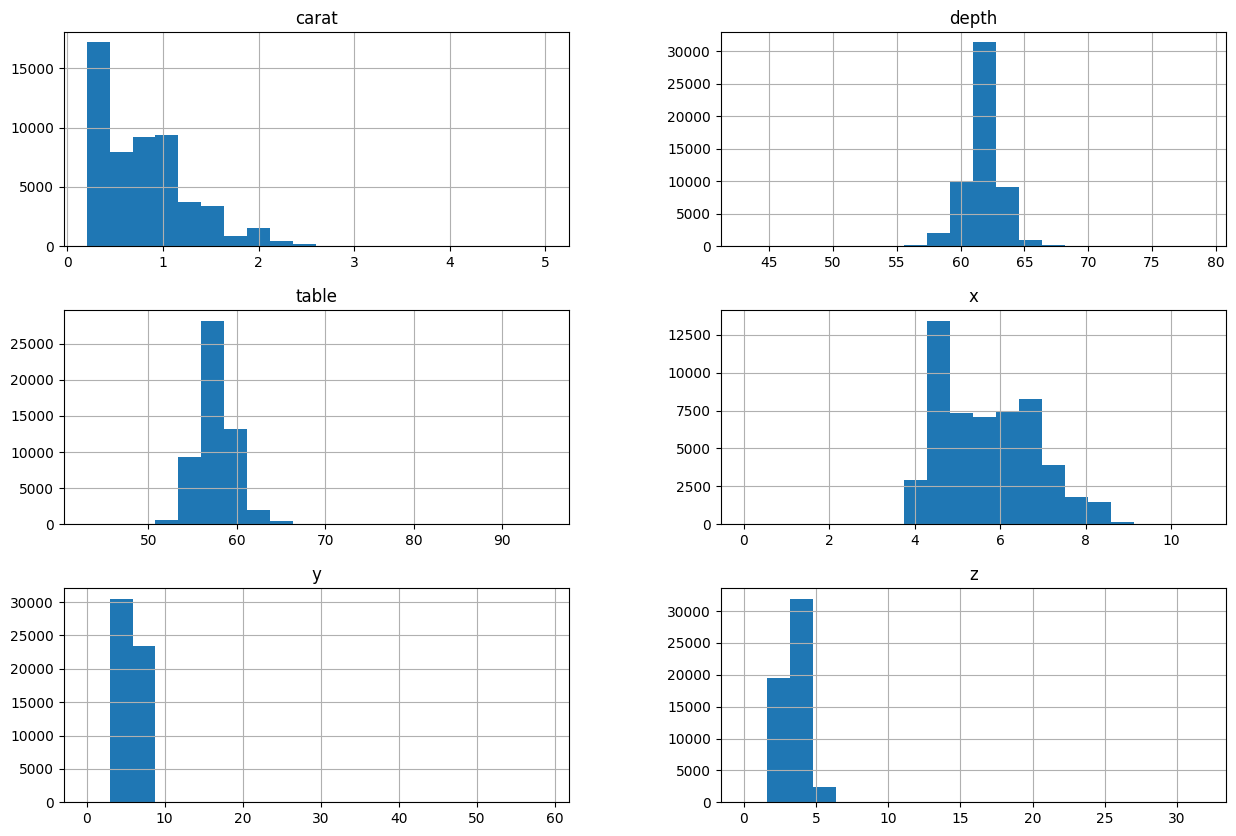

In [ ]:
# Plotting histograms of multiple columns together
diamondsData.hist(['carat', 'depth', 'table', 'x', 'y', 'z'], figsize = (15,10), bins = 20)

# Find out the range of these columns
print("Min and Max for 'carat'", min(diamondsData['carat']), max(diamondsData['carat']))
print("Min and Max for 'depth'", min(diamondsData['depth']), max(diamondsData['depth']))
print("Min and Max for 'table'", min(diamondsData['table']), max(diamondsData['table']))
# As we know, for x, y, and z zero means missing data
print("Min and Max for 'x'", min(diamondsData['x'][diamondsData['x'] > 0]), max(diamondsData['x']))
print("Min and Max for 'y'", min(diamondsData['y'][diamondsData['y'] > 0]), max(diamondsData['y']))
print("Min and Max for 'z'", min(diamondsData['z'][diamondsData['z'] > 0]), max(diamondsData['z']))

### Histogram Observation for Continuous Predictors
- Each histogram shows us the data distribution for a single continuous variable where the X-axis shows the range of values and the Y-axis represents the number of values in that range.
- The distributions for carat, y, and z are right-skewed.
- The distribution for both depth and table are ideally normalised.
- Selected Continuous Variables:
  - carat: Selected. Outliers seen beyond 3, need to treat them.
  - depth: Selected. Outliers seen less than 55 or beyond 70, need to treat them.
  - table: Selected. Outliers seen less than 50 or beyond 70, need to treat them.
  - x: Selected. The distribution is good.
  - y: Selected. Outliers seen beyond 10, need to treat them.
  - z: Selected. Outliers seen beyond 7.5, need to treat them.

# Step 8: Feature Selection Based on Data Distribution
According to the Data Distributions, we select:
- Selected Categorical Variables:
  - cut: Selected. Each bar contains sufficent data.
  - color: Each bar contains sufficent data.
  - clarity: Each bar contains sufficent data.
- Selected Continuous Variables:
  - carat: Selected. Need to further confirm after the outlier treatment.
  - depth: Selected. Need to further confirm after the outlier treatment.
  - table: Selected. Need to further confirm after the outlier treatment.
  - x: Selected. The distribution is good.
  - y: Selected. Need to further confirm after the outlier treatment.
  - z: Selected. Need to further confirm after the outlier treatment.

# Step 9: Removal of outliers and missing values

## Outlier Analysis
- Outliers are extreme values in the data which are far away from most of the values.
- Here, because of the nature of diamonds, these outliners are not all fault values. Therefore, we choose to delete the furthest outlier records if have, and then impute the closer outlier values with a logical business value to treat outliners in the data.

In [ ]:
# Find out the outliers and observe - carat
diamondsData[(diamondsData['carat']>4)].sort_values(by=['carat'])

,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
25998,4.01,4,2,1,61.0,61.0,15223,7.096824,10.14,10.10,6.17
25999,4.01,4,1,1,62.5,62.0,15223,7.096824,10.02,9.94,6.24
27130,4.13,1,3,1,64.8,61.0,17329,7.164502,10.00,9.85,6.43
27630,4.50,1,1,1,65.8,58.0,18531,7.199300,10.23,10.16,6.72
27415,5.01,1,1,1,65.5,59.0,18018,7.184752,10.74,10.54,6.98


In [ ]:
# Find out the outliers and observe - depth
diamondsData[(diamondsData['depth'] > 72.5) | (diamondsData['depth'] < 52.5)].sort_values(by=['depth'])

,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
4518,1.00,1,4,3,43.0,59.0,3634,6.308138,6.32,6.27,3.97
10377,1.09,5,1,4,43.0,54.0,4778,6.464730,6.53,6.55,4.12
6341,1.00,1,4,4,44.0,53.0,4032,6.367940,6.31,6.24,4.12
16857,1.43,1,2,5,50.8,60.0,6727,6.656474,7.73,7.25,3.93
36503,0.30,1,6,6,51.0,67.0,945,5.494248,4.67,4.62,2.37
47775,0.70,1,7,3,52.2,65.0,1895,5.923854,6.04,5.99,3.14
40766,0.37,1,5,8,52.3,61.0,1166,5.626119,4.96,4.91,2.58
53540,0.90,1,4,3,72.9,54.0,2691,6.132913,5.74,5.67,4.16
46679,0.99,1,1,1,73.6,60.0,1789,5.889068,6.01,5.80,4.35
41918,1.03,1,6,1,78.2,54.0,1262,5.675288,5.72,5.59,4.42


In [ ]:
# Find out the outliers and observe - table
diamondsData[(diamondsData['table'] > 70) | (diamondsData['table'] < 45)].sort_values(by=['table'])

,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
11368,1.04,5,2,5,62.9,43.0,4997,6.490099,6.45,6.41,4.04
35633,0.29,3,6,5,62.8,44.0,474,5.047991,4.20,4.24,2.65
44938,0.68,1,4,3,58.0,71.0,1633,5.833655,5.85,5.70,3.35
49375,0.70,1,3,5,62.0,73.0,2100,5.985597,5.65,5.54,3.47
51391,0.71,1,7,4,55.6,73.0,2368,6.057256,6.01,5.96,3.33
52860,0.50,1,6,4,79.0,73.0,2579,6.107832,5.21,5.18,4.09
52861,0.50,1,6,4,79.0,73.0,2579,6.107832,5.21,5.18,4.09
51342,0.79,1,4,3,65.3,76.0,2362,6.055748,5.52,5.13,3.35
50773,0.81,1,5,2,68.8,79.0,2301,6.040184,5.26,5.20,3.58
24932,2.01,1,5,3,58.6,95.0,13387,7.029112,8.32,8.31,4.87


In [ ]:
# Find out the outliers and observe - y
diamondsData[(diamondsData['y']>15)].sort_values(by=['y'])

,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
49189,0.51,5,6,5,61.8,55.0,2075,5.978420,5.15,31.8,5.12
24067,2.00,4,3,2,58.9,57.0,12210,6.980268,8.09,58.9,8.06


In [ ]:
# Find out the outliers and observe - z
diamondsData[(diamondsData['z']>10)].sort_values(by=['z'])

,carat,cut,color,clarity,depth,table,price,boxcox_price,x,y,z
48410,0.51,3,6,5,61.8,54.7,1970,5.947235,5.12,5.15,31.8


In [ ]:
# Delete the furthest outliers and replace other closer outliers with the nearest values
# Find the nearest value to 4 carat, and delete the furthest outliers (carat = 5.01) with index = 27415
print(max(diamondsData['carat'][diamondsData['carat'] <= 4]))
diamondsData.drop(diamondsData['carat'][diamondsData['carat'] == 5.01].index, inplace = True)

4.0


In [ ]:
# Replacing outliers with nearest possibe value
diamondsData['carat'][diamondsData['carat'] > 4] = 4.0

In [ ]:
# Delete the furthest outliers and replace other closer outliers with the nearest values
# Find the nearest value to the range of 52.5 and 72.5 table
print(min(diamondsData['depth'][(diamondsData['depth'] <= 72.5) & (diamondsData['depth'] >= 52.5)]))
print(max(diamondsData['depth'][(diamondsData['depth'] <= 72.5) & (diamondsData['depth'] >= 52.5)]))

52.7
72.2


In [ ]:
# Replacing outliers with nearest possibe value
diamondsData['depth'][diamondsData['depth'] > 72.5] = 72.2
diamondsData['depth'][diamondsData['depth'] < 52.5] = 52.7

In [ ]:
# Delete the furthest outliers and replace other closer outliers with the nearest values
# Find the nearest value to the range of 45 and 70 table, and delete the furthest outliers (table = 95.0) with index = 24932
diamondsData.drop(diamondsData['table'][diamondsData['table'] == 95.0].index, inplace = True)
print(min(diamondsData['table'][(diamondsData['table'] <= 70) & (diamondsData['table'] >= 45)]))
print(max(diamondsData['table'][(diamondsData['table'] <= 70) & (diamondsData['table'] >= 45)]))

49.0
70.0


In [ ]:
# Replacing outliers with nearest possibe value
diamondsData['table'][diamondsData['table'] > 70] = 70.0
diamondsData['table'][diamondsData['table'] < 45] = 49.0

In [ ]:
# For y and z, because the outliers are extremely far, delete the outliers as the treatment
diamondsData.drop(diamondsData['y'][diamondsData['y'] > 15].index, inplace = True)
diamondsData.drop(diamondsData['z'][diamondsData['z'] > 10].index, inplace = True)

## Visualising Data Distribution After Outlier Removal


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

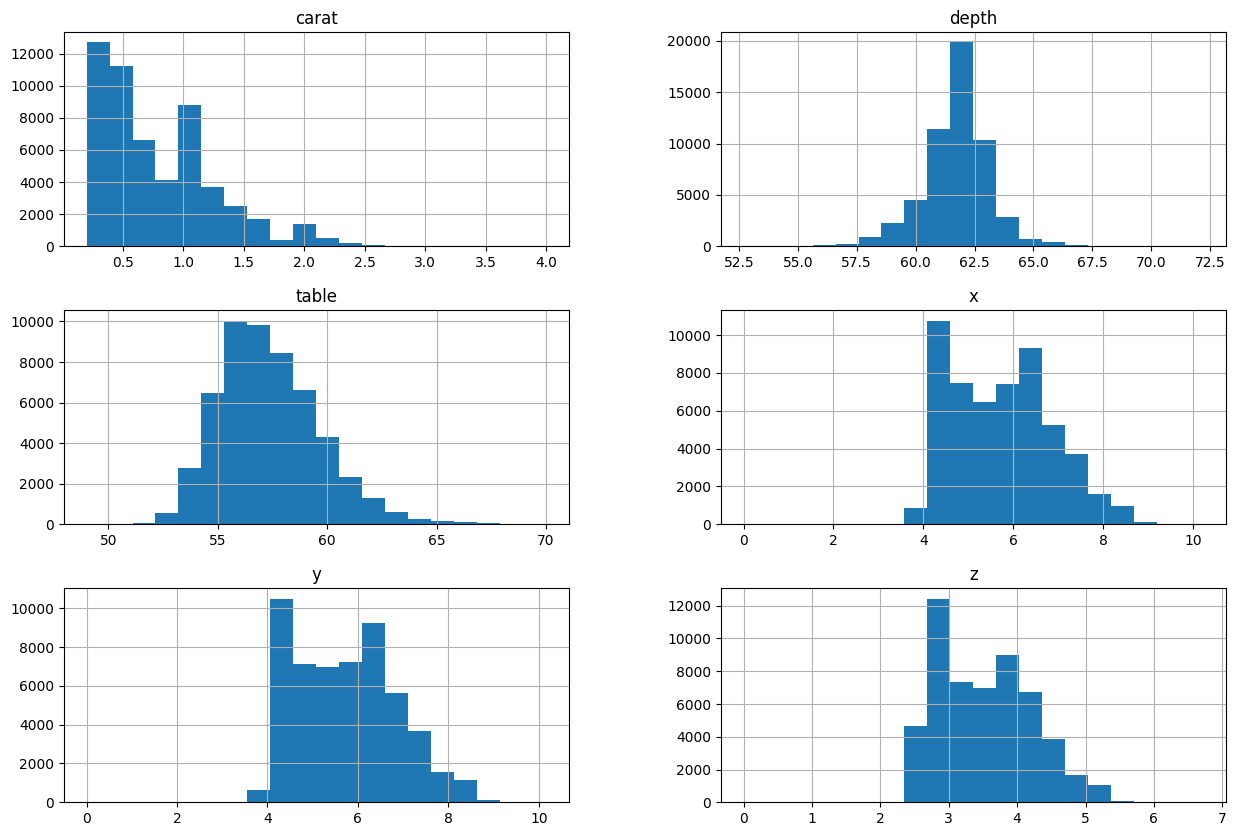

In [ ]:
# Plotting histograms of multiple columns after treatment of outliers
diamondsData.hist(['carat', 'depth', 'table', 'x', 'y', 'z'], figsize = (15,10), bins = 20)

### Observation After the Outliers Treatments
- The distributions have improved after the outlier treatment.
- There are still tails but, as we know from the step 10, there are many values in that range now, hence, it is acceptable.

## Missing Values Analysis and Treatment
- Missing values are treated for each column separately.
- As we observed above, the 0.0 in column x, y, and z indicates missing values, we need to treat them althrough they are not null.

In [ ]:
# Finding how many missing values are there for each column
diamondsData.isnull().sum()

carat           0
cut             0
color           0
clarity         0
depth           0
table           0
price           0
boxcox_price    0
x               0
y               0
z               0
dtype: int64

In [ ]:
# Delete the rows with missing values in x, y, and z
diamondsData.drop(diamondsData['x'][diamondsData['x'] == 0.0].index, inplace = True)
diamondsData.drop(diamondsData['y'][diamondsData['y'] == 0.0].index, inplace = True)
diamondsData.drop(diamondsData['z'][diamondsData['z'] == 0.0].index, inplace = True)

Removed rows with missing value where x, y, or z are zero.

# Step 10: Visual and Statistic Correlation Analysis for Selection of the Best Features
Currently, we have:
  - cut (categorical)
  - color (categorical)
  - clarity (categorical)
  - carat (continuous)
  - depth (continuous)
  - table (continuous)
  - x (continuous)
  - y (continuous)
  - z (continuous)

And the target variable: boxcox_price (continuous).

Therefore, we will do:

- Scatter Charts and Correlation Matrix for 'carat', 'depth', and 'table'.
- Box Plots and ANOVA Test for 'cut', 'color', and 'clarity'.

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

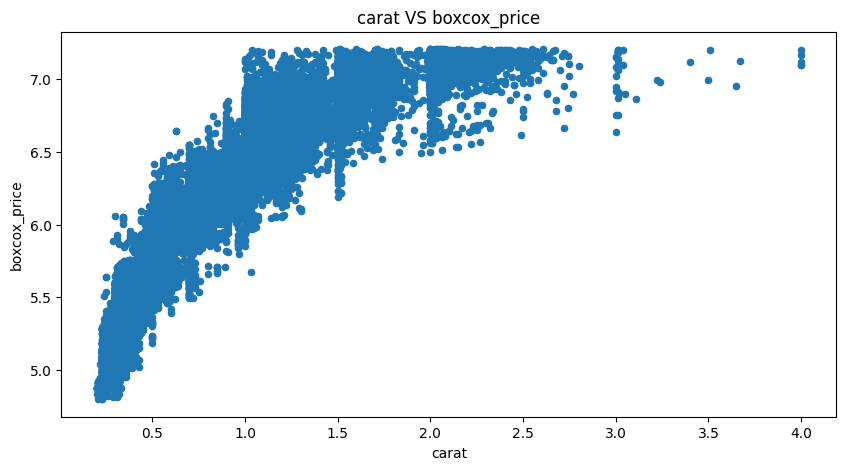

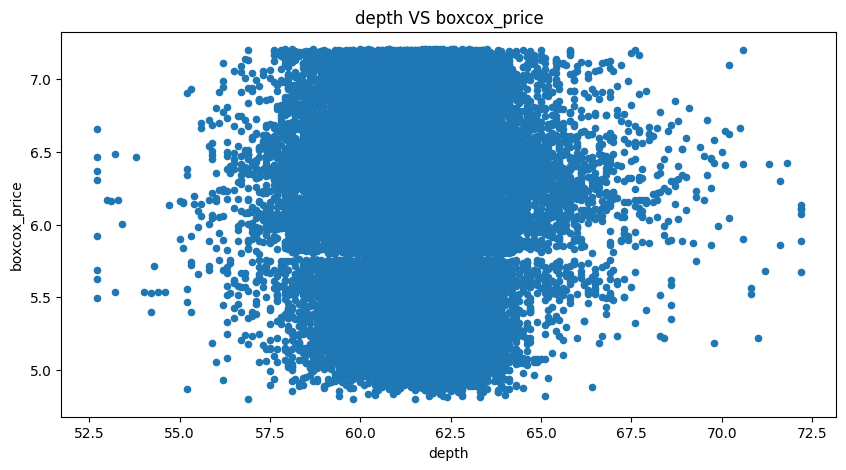

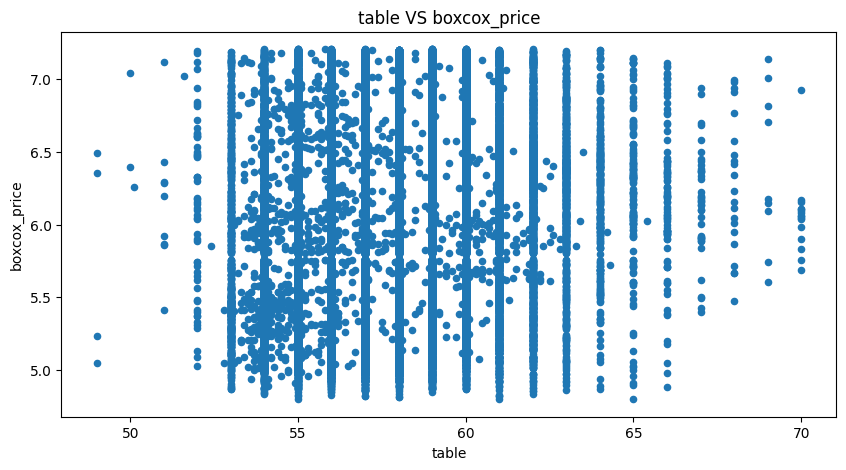

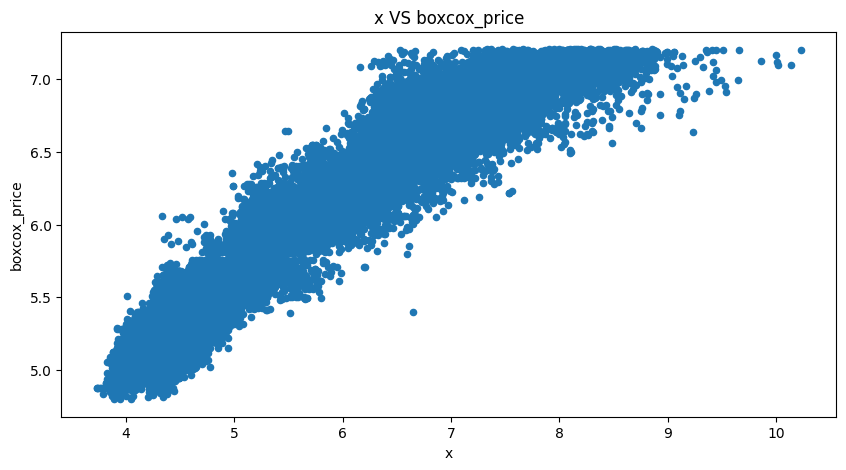

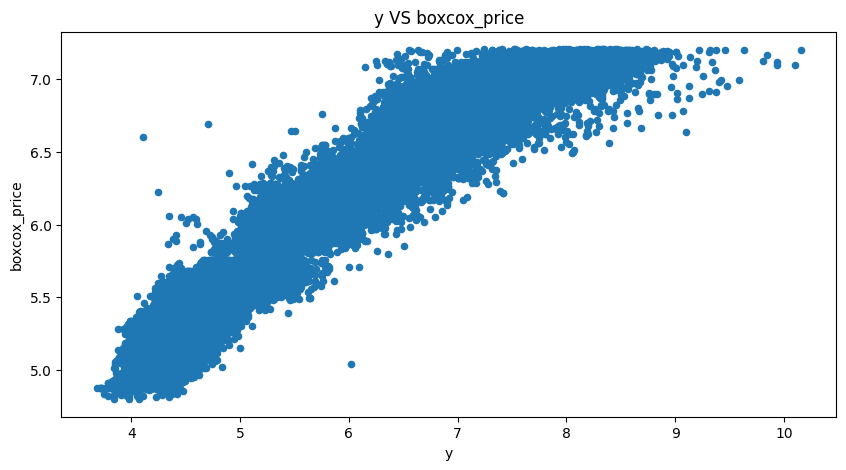

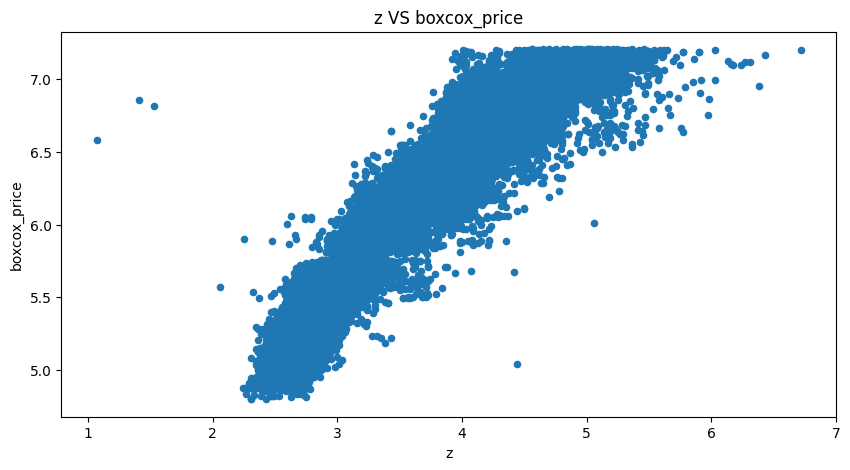

In [ ]:
ContinuousPreds=['carat', 'depth', 'table', 'x', 'y', 'z']
# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousPreds:
  diamondsData.plot.scatter(x = predictor, y = 'boxcox_price', figsize=(10,5), title = predictor + " VS " + 'boxcox_price')

### Observation from the Scatter Charts
- Clear increasing trends are observed for carat vs boxcox_price, x vs boxcox_price, y vs boxcox_price, and z vs boxcox_price, indicating that carat, x, y, and z are positively correlated to boxcox_price. These are good for ML model building.
- No trend are found for depth vs boxcox_price and table vs boxcox_price, means there is no correlations between depth and boxcox_price, and between table and boxcox_price, might indicate that these predictors may not be the best one for ML model building.
- We will futher confirm it by looking at the correlation values.

## Statistical Feature Selection (Continuous Vs Continuous) Using Correlation Matrix
- Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend, and correlation near {0} means No relationship, the scatter plot will show no clear trend.
- If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter.
- We'll observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable, and select the predictor with the absolute correlation value > 0.5.

In [ ]:
# Calculating correlation matrix
ContinuousCols=['boxcox_price','carat', 'depth', 'table', 'x', 'y', 'z']
# Creating the correlation matrix
CorrelationData=diamondsData[ContinuousCols].corr()
CorrelationData

,boxcox_price,carat,depth,table,x,y,z
boxcox_price,1.000000,0.913271,0.001630,0.159021,0.958109,0.958800,0.954076
carat,0.913271,1.000000,0.028426,0.181772,0.978015,0.977110,0.976664
depth,0.001630,0.028426,1.000000,-0.300458,-0.024922,-0.028073,0.097226
table,0.159021,0.181772,-0.300458,1.000000,0.196318,0.190159,0.155977
x,0.958109,0.978015,-0.024922,0.196318,1.000000,0.998657,0.991076
y,0.958800,0.977110,-0.028073,0.190159,0.998657,1.000000,0.990731
z,0.954076,0.976664,0.097226,0.155977,0.991076,0.990731,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['boxcox_price'][abs(CorrelationData['boxcox_price']) > 0.5 ]

boxcox_price    1.000000
carat           0.913271
x               0.958109
y               0.958800
z               0.954076
Name: boxcox_price, dtype: float64

### Observation from the Correlation Matrix
- The results of Correlation Matrix confirm our visual analysis using Scatter Charts above.
- Continuous variables, carat, x, y, and z are correlated with the target variable.
- Final selected Continuous columns: **'carat'**, **'x'**, **'y'**, and **'z'**.

## Relationship exploration: Categorical Vs Continuous -- Box Plots

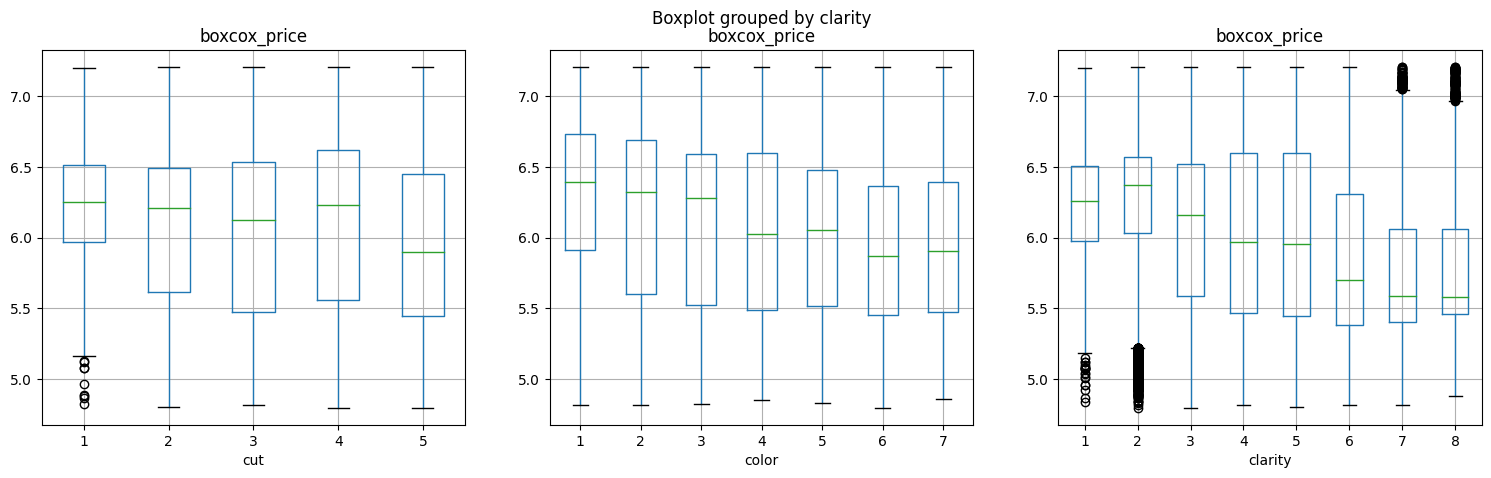

In [ ]:
# Box plots for continuous Target Variable "boxcox_price" and Categorical predictors
CategoricalPredsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalPredsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "boxcox_price"
for PredictorCol , i in zip(CategoricalPredsList, range(len(CategoricalPredsList))):
  diamondsData.boxplot(column='boxcox_price', by = PredictorCol, figsize=(5,5), vert=True, ax = PlotCanvas[i])

### Observations from the Box-Plots
- The distributions are different for each category here, which indicate that these variables might be correlated with boxcox_price.
- For the diamonds dataset, all these categorical predictors ('cut', 'color', and 'clarity') looks correlated with the Target variable boxcox_price.

We will further confirm this by looking at the results of ANOVA Test.

## Statistical Feature Selection (Categorical Vs Continuous) Using ANOVA Test

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
  from scipy.stats import f_oneway

  # Creating an empty list of final selected predictors
  SelectedPredictors=[]

  print('##### ANOVA Results ##### \n')
  for predictor in CategoricalPredictorList:
    CategoryGroupLists = inpData.groupby(predictor)[TargetVariable].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)

    # If the ANOVA P-Value is <0.05, that means we reject H0
    if (AnovaResults[1] < 0.05):
      print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
      SelectedPredictors.append(predictor)
    else:
      print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
  return(SelectedPredictors)

#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['cut', 'color', 'clarity']
FunctionAnova(inpData = diamondsData, TargetVariable = 'boxcox_price', CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

cut is correlated with boxcox_price | P-Value: 3.20081213627644e-212
color is correlated with boxcox_price | P-Value: 6.856061943444497e-287
clarity is correlated with boxcox_price | P-Value: 0.0


['cut', 'color', 'clarity']

### Observation from the ANOVA Test
- The results of ANOVA Test confirm our visual analysis using Box Plots above.
- All categorical variables are correlated with the target variable.
- Final selected Categorical columns: **'cut'**, **'color'**, and **'clarity'**.

## Selecting final Predictors/Features for building Machine Learning/AI model.
Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning
model building as:
- **carat**
- **cut**
- **color**
- **clarity**
- **x**
- **y**
- **z**

In [ ]:
SelectedPreds=['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']

# Selecting final columns of the predictors
DataForML = diamondsData[SelectedPreds]
DataForML.head()

,carat,cut,color,clarity,x,y,z
0,0.23,5,6,2,3.95,3.98,2.43
1,0.21,4,6,3,3.89,3.84,2.31
2,0.23,2,6,5,4.05,4.07,2.31
3,0.29,4,2,4,4.20,4.23,2.63
4,0.31,2,1,2,4.34,4.35,2.75


### Save the final data subset for reference during deployment.

In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Step 11: Data Conversion to Numeric Values for Machine Learning/Predictive Analysis
Data Pre-processing:

- Since we converted the ordinal categorical columns to numeric already when converting them from qualitative to quantative, we will treat them directly as norminal variable here to ensure numeric format.
  - cut
  - color
  - clarity
- Data Transformation: log10(carat) produced the best results.
  - carat

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric = pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['boxcox_price'] = diamondsData['boxcox_price']

# Adding the Orginal Target Variable to the data for further check with the accuracy
DataForML_Numeric['price'] = diamondsData['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,cut,color,clarity,x,y,z,boxcox_price,price
0,0.23,5,6,2,3.95,3.98,2.43,4.797128,326
1,0.21,4,6,3,3.89,3.84,2.31,4.797128,326
2,0.23,2,6,5,4.05,4.07,2.31,4.799206,327
3,0.29,4,2,4,4.20,4.23,2.63,4.813567,334
4,0.31,2,1,2,4.34,4.35,2.75,4.815592,335


<Axes: >

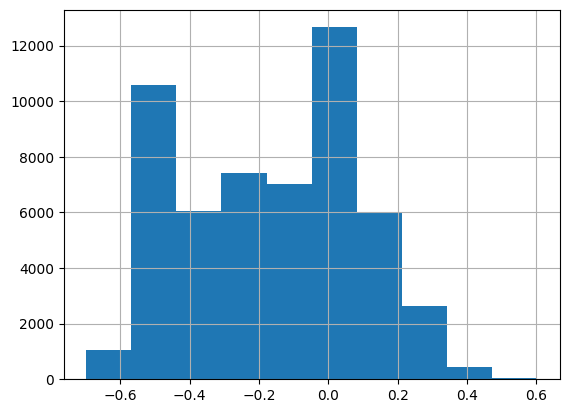

In [ ]:
# Use log10 to transfer the carat to be normalised, hist to check
log_carat = np.log10(DataForML_Numeric['carat'])
log_carat.hist()

In [ ]:
# Replace the column of carat by log_carat
DataForML_Numeric.insert(0, "log_carat", log_carat, True)
DataForML_Numeric.drop(columns = ['carat'], inplace = True)

# Step 12: Training/Testing Sampling and K-fold Cross Validation
Splitting the data into Training and Testing sample: 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['log_carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'boxcox_price',
       'price'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable = 'boxcox_price'
Predictors = ['log_carat', 'cut', 'color', 'clarity', 'x', 'y', 'z']

X = DataForML_Numeric[Predictors].values
y = DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37740, 7)
(37740,)
(16175, 7)
(16175,)


The K-fold Cross Validation will be applied on each model we would investigate below.

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Step 13: Investigating multiple Regression algorithms

In [ ]:
# Defining a custom function to calculate accuracy
# There are no zeros in the Target variable
def Accuracy_Score(orig, pred):
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
  # Accuracy = 100 - MAPE
  return(100 - MAPE)

## Multiple Linear Regression

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Creating the model on Training Data
LREG = RegModel.fit(X_train,y_train)

# Printing all the parameters of Linear regression
Intercept = LREG.intercept_
Parameters = LREG.coef_
MLModelDescription = f'{round(Intercept,4)}'
for predictor in Predictors:
  print('The parameter for ' + predictor + f'is: {Parameters[Predictors.index(predictor)]}')
  MLModelDescription += f' + {round(Parameters[Predictors.index(predictor)],4)}*' + predictor
print(f'The intercept is: {Intercept}')
print('The Multiple Linear Regression Model is: ' + MLModelDescription)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, LREG.predict(X_train)))
print('#' * 70)

# Use the MLG model to predict
prediction = LREG.predict(X_test)
###########################################################################
print('\n---------- Model Validation and Accuracy Calculations ----------')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Convert the predicted boxcox_price back to price
from scipy.special import inv_boxcox
TestingDataResults['predicted_price'] = round(inv_boxcox(TestingDataResults['Predicted_boxcox_price'], best_lambda), 2)

# Printing sample prediction values
print(TestingDataResults.head(10))

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['boxcox_price'] - TestingDataResults['Predicted_boxcox_price'])) / TestingDataResults['boxcox_price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

The parameter for log_caratis: 3.038241179944995
The parameter for cutis: 0.019183074385090898
The parameter for coloris: 0.04640313638593831
The parameter for clarityis: 0.072874143315671
The parameter for xis: -0.014232708847272832
The parameter for yis: -0.02524828520608198
The parameter for zis: -0.11311341192077279
The intercept is: 6.620265772588437
The Multiple Linear Regression Model is: 6.6203 + 3.0382*log_carat + 0.0192*cut + 0.0464*color + 0.0729*clarity + -0.0142*x + -0.0252*y + -0.1131*z
R2 Value: 0.9798750403502318
######################################################################

---------- Model Validation and Accuracy Calculations ----------
   log_carat  cut  color  clarity     x     y     z  boxcox_price  \
0   0.311754  4.0    2.0      4.0  8.07  8.12  5.06      7.119518   
1  -0.522879  3.0    3.0      3.0  4.29  4.26  2.71      5.133893   
2  -0.508638  3.0    3.0      6.0  4.37  4.39  2.68      5.229332   
3  -0.251812  5.0    5.0      4.0  5.28  5.30  3.31 

## Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.96187543154185
######################################################################

---------- Model Validation and Accuracy Calculations ----------
   log_carat  cut  color  clarity     x     y     z  boxcox_price  \
0   0.311754  4.0    2.0      4.0  8.07  8.12  5.06      7.119518   
1  -0.522879  3.0    3.0      3.0  4.29  4.26  2.71      5.133893   
2  -0.508638  3.0    3.0      6.0  4.37  4.39  2.68      5.229332   
3  -0.251812  5.0    5.0      4.0  5.28  5.30  3.31      5.879511   
4  -0.236572  3.0    6.0      3.0  5.41  5.42  3.23      5.762228   

   Predicted_boxcox_price  predicted_price  
0                7.084553         14871.31  
1                5.126517           533.97  
2                5.126517           533.97  
3                5.872740          1741.44  
4                5.850371          1678.47  
Mean Accuracy on test data: 98.4656016459371
Median Accuracy on test data: 98.783552921853

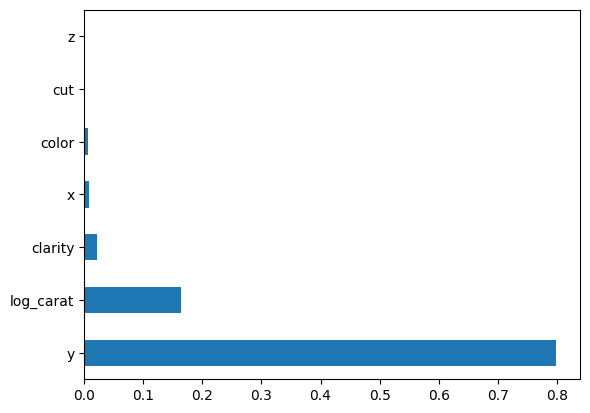

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5, criterion = 'friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT = RegModel.fit(X_train,y_train)
prediction = DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))
print('#' * 70)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind = 'barh')

###########################################################################
print('\n---------- Model Validation and Accuracy Calculations ----------')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Convert the predicted boxcox_price back to price
from scipy.special import inv_boxcox
TestingDataResults['predicted_price'] = round(inv_boxcox(TestingDataResults['Predicted_boxcox_price'], best_lambda), 2)

# Printing sample prediction values
print(TestingDataResults.head())
# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['boxcox_price'] - TestingDataResults['Predicted_boxcox_price'])) / TestingDataResults['boxcox_price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

### Plotting/Visualising the Decision Tree

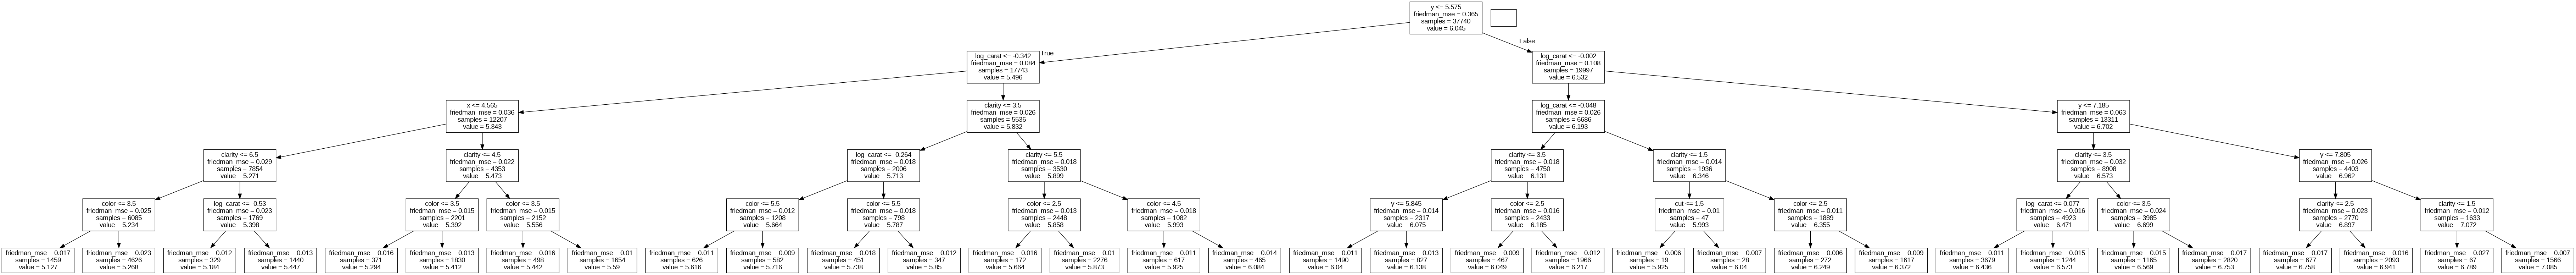

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file = None, feature_names = Predictors, class_names = TargetVariable)
# printing the rules
#print(dot_data)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width = 2000,height = 2000)
# Double click on the graph to zoom in

## Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9543648331567994
######################################################################

---------- Model Validation and Accuracy Calculations ----------
   log_carat  cut  color  clarity     x     y     z  boxcox_price  \
0   0.311754  4.0    2.0      4.0  8.07  8.12  5.06      7.119518   
1  -0.522879  3.0    3.0      3.0  4.29  4.26  2.71      5.133893   
2  -0.508638  3.0    3.0      6.0  4.37  4.39  2.68      5.229332   
3  -0.251812  5.0    5.0      4.0  5.28  5.30  3.31      5.879511   
4  -0.236572  3.0    6.0      3.0  5.41  5.42  3.23      5.762228   

   Predicted_boxcox_price  predicted_price  
0                7.071502         14506.76  
1                5.207514           604.38  
2                5.285002           681.08  
3                5.860017          1705.32  
4                5.775511          1484.80  
Mean Accuracy on test data: 98.3136482201475
Median Accuracy on test d

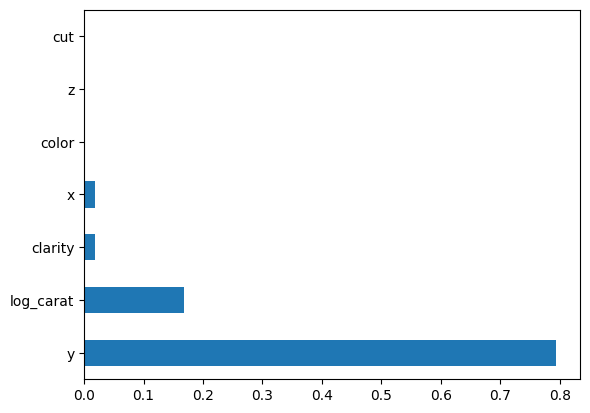

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth = 4, n_estimators = 400,criterion = 'friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000
# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF = RegModel.fit(X_train,y_train)
prediction = RF.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))
print('#' * 70)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind = 'barh')

###########################################################################
print('\n---------- Model Validation and Accuracy Calculations ----------')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Convert the predicted boxcox_price back to price
from scipy.special import inv_boxcox
TestingDataResults['predicted_price'] = round(inv_boxcox(TestingDataResults['Predicted_boxcox_price'], best_lambda), 2)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['boxcox_price'] - TestingDataResults['Predicted_boxcox_price'])) / TestingDataResults['boxcox_price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

### Plotting One of the Decision Tree in Random Forest Regressor

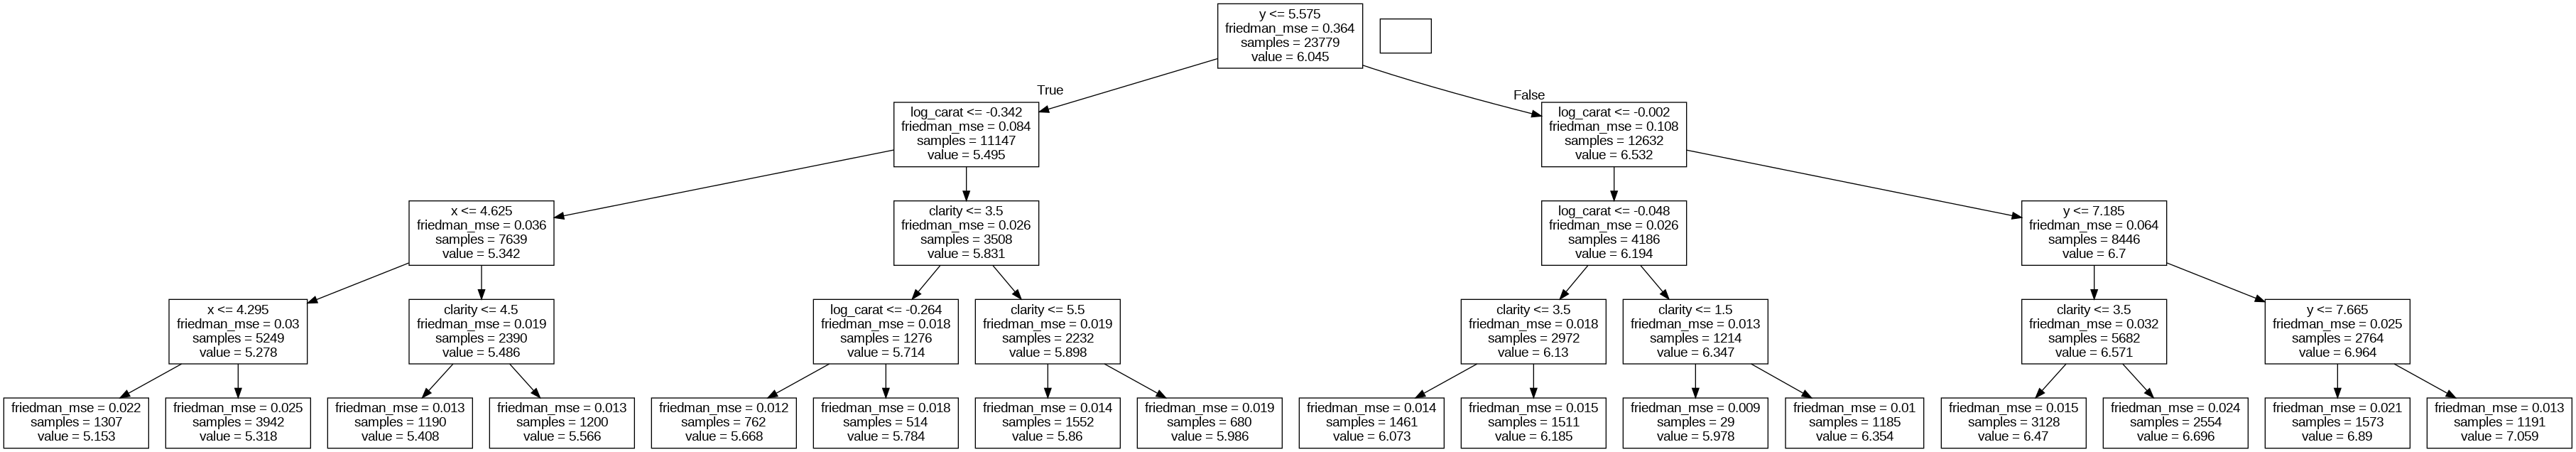

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file = None, feature_names = Predictors, class_names = TargetVariable)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png(), width = 2000,height = 2000)
# Double click on the graph to zoom in

## AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9390383132554723
######################################################################

---------- Model Validation and Accuracy Calculations ----------
   log_carat  cut  color  clarity     x     y     z  boxcox_price  \
0   0.311754  4.0    2.0      4.0  8.07  8.12  5.06      7.119518   
1  -0.522879  3.0    3.0      3.0  4.29  4.26  2.71      5.133893   
2  -0.508638  3.0    3.0      6.0  4.37  4.39  2.68      5.229332   
3  -0.251812  5.0    5.0      4.0  5.28  5.30  3.31      5.879511   
4  -0.236572  3.0    6.0      3.0  5.41  5.42  3.23      5.762228   

   Predicted_boxcox_price  predicted_price  
0                6.951831         11576.03  
1                5.229991           625.63  
2                5.268124           663.53  
3                5.833093          1631.49  
4                5.776991          1488.39  
Mean Accuracy on test da

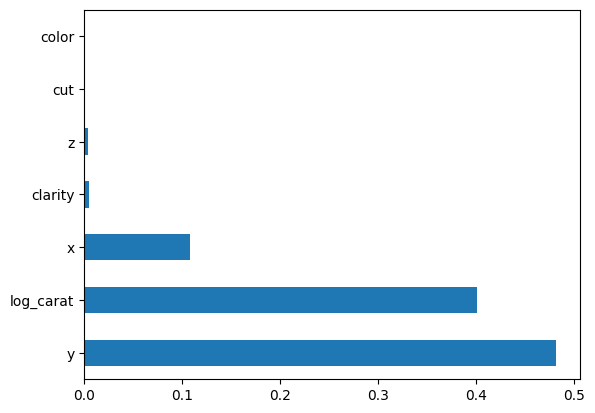

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth = 3)
RegModel = AdaBoostRegressor(n_estimators = 100, base_estimator = DTR ,learning_rate = 0.04)
# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB = RegModel.fit(X_train, y_train)
prediction = AB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))
print('#' * 70)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index = Predictors)
feature_importances.nlargest(10).plot(kind = 'barh')

###########################################################################
print('\n---------- Model Validation and Accuracy Calculations ----------')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Convert the predicted boxcox_price back to price
from scipy.special import inv_boxcox
TestingDataResults['predicted_price'] = round(inv_boxcox(TestingDataResults['Predicted_boxcox_price'], best_lambda), 2)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['boxcox_price'] - TestingDataResults['Predicted_boxcox_price'])) / TestingDataResults['boxcox_price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy=100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

## XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9919260410484019
######################################################################

---------- Model Validation and Accuracy Calculations ----------
   log_carat  cut  color  clarity     x     y     z  boxcox_price  \
0   0.311754 

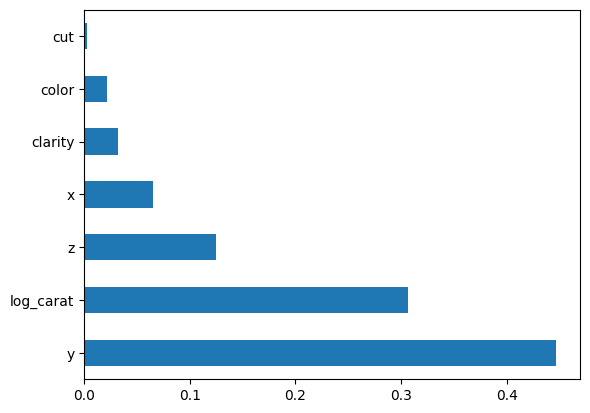

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel = XGBRegressor(max_depth = 2, learning_rate = 0.1, n_estimators = 1000, objective = 'reg:linear', booster = 'gbtree')
# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB = RegModel.fit(X_train, y_train)
prediction = XGB.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, XGB.predict(X_train)))
print('#' * 70)

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index = Predictors)
feature_importances.nlargest(10).plot(kind = 'barh')

###########################################################################
print('\n---------- Model Validation and Accuracy Calculations ----------')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Convert the predicted boxcox_price back to price
from scipy.special import inv_boxcox
TestingDataResults['predicted_price'] = round(inv_boxcox(TestingDataResults['Predicted_boxcox_price'], best_lambda), 2)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['boxcox_price'] - TestingDataResults['Predicted_boxcox_price'])) / TestingDataResults['boxcox_price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

<Axes: >

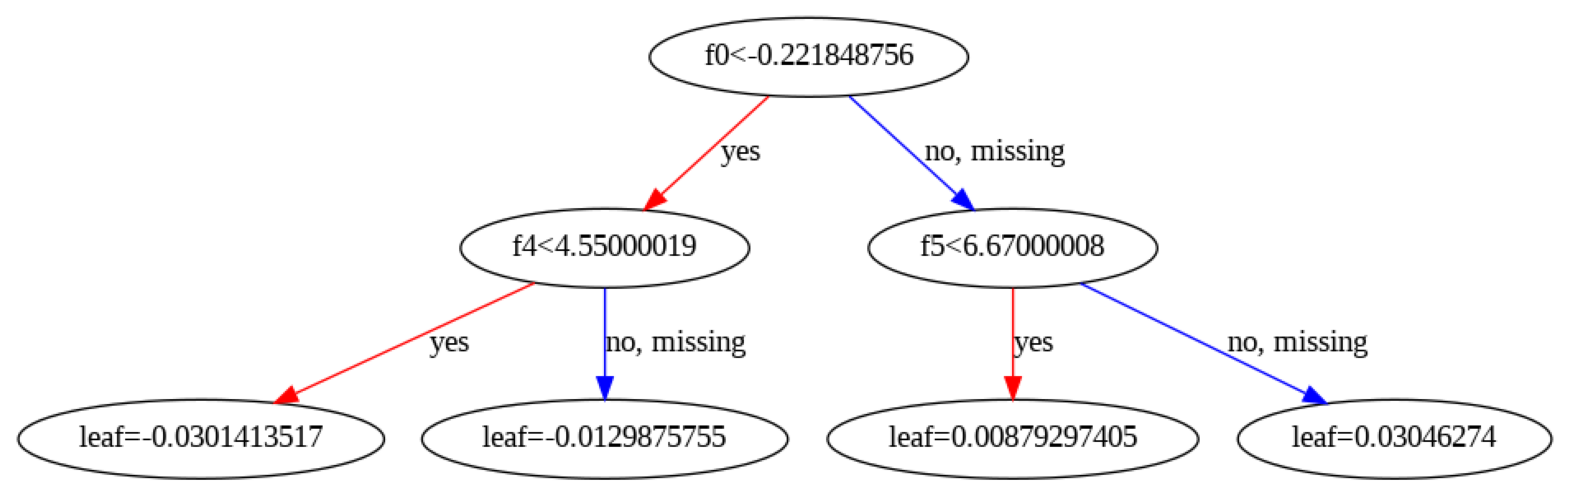

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors = 3)
# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN = RegModel.fit(X_train,y_train)
prediction = KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, KNN.predict(X_train)))
print('#' * 70)

###########################################################################
print('\n---------- Model Validation and Accuracy Calculations ----------')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Convert the predicted boxcox_price back to price
from scipy.special import inv_boxcox
TestingDataResults['predicted_price'] = round(inv_boxcox(TestingDataResults['Predicted_boxcox_price'], best_lambda), 2)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['boxcox_price'] - TestingDataResults['Predicted_boxcox_price'])) / TestingDataResults['boxcox_price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9945706342119234
######################################################################

---------- Model Validation and Accuracy Calculations ----------
   log_carat  cut  color  clarity     x     y     z  boxcox_price  \
0   0.311754  4.0    2.0      4.0  8.07  8.12  5.06      7.119518   
1  -0.522879  3.0    3.0      3.0  4.29  4.26  2.71      5.133893   
2  -0.508638  3.0    3.0      6.0  4.37  4.39  2.68      5.229332   
3  -0.251812  5.0    5.0      4.0  5.28  5.30  3.31      5.879511   
4  -0.236572  3.0    6.0      3.0  5.41  5.42  3.23      5.762228   

   Predicted_boxcox_price  predicted_price  
0                7.148588         16807.27  
1                5.145078           549.29  
2                5.202052           599.34  
3                5.852270          1683.72  
4                5.822891          1604.42  
Mean Accuracy on test data: 99.23755616289598
Median Accuracy on test data: 99.46915088719479

Accuracy values for

## Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C = 50, kernel = 'rbf', gamma = 0.01)
# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM = RegModel.fit(X_train,y_train)
prediction = SVM.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:', metrics.r2_score(y_train, SVM.predict(X_train)))
print('#' * 70)

###########################################################################
print('\n---------- Model Validation and Accuracy Calculations ----------')
# Printing some sample values of prediction
TestingDataResults = pd.DataFrame(data = X_test, columns = Predictors)
TestingDataResults[TargetVariable] = y_test
TestingDataResults[('Predicted_' + TargetVariable)] = prediction

# Convert the predicted boxcox_price back to price
from scipy.special import inv_boxcox
TestingDataResults['predicted_price'] = round(inv_boxcox(TestingDataResults['Predicted_boxcox_price'], best_lambda), 2)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE'] = 100 * ((abs(TestingDataResults['boxcox_price'] - TestingDataResults['Predicted_boxcox_price'])) / TestingDataResults['boxcox_price'])
MAPE = np.mean(TestingDataResults['APE'])
MedianMAPE = np.median(TestingDataResults['APE'])
Accuracy = 100 - MAPE
MedianAccuracy = 100 - MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better = True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values = cross_val_score(RegModel, X , y, cv = 10, scoring = custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(), 2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9881585568892989
######################################################################

---------- Model Validation and Accuracy Calculations ----------
   log_carat  cut  color  clarity     x     y     z  boxcox_price  \
0   0.311754  4.0    2.0      4.0  8.07  8.12  5.06      7.119518   
1  -0.522879  3.0    3.0      3.0  4.29  4.26  2.71      5.133893   
2  -0.508638  3.0    3.0      6.0  4.37  4.39  2.68      5.229332   
3  -0.251812  5.0    5.0      4.0  5.28  5.30  3.31      5.879511   
4  -0.236572  3.0    6.0      3.0  5.41  5.42  3.23      5.762228   

   Predicted_boxcox_price  predicted_price  
0                7.130085         16221.64  
1                5.061660           483.90  
2                5.253710           648.93  
3                5.892446          1799.01  
4                5.842748          1657.57  
Mean Accuracy on test data: 99.12657537079043
Median Accuracy on test data: 99.26867646352042

Accuracy values for 10-fold Cros

# Step 14: Selection of the best Model
Compare with the prediction Accuracy, all the regressions have similar great prediction accuracy over 97%, among the all, we found:
- XGBoost Regressor model has the highest Average Accuracy for K-fold(k = 10) equaling to 99.19%.

Therefore, we'll select the XGBoost Regressor model as our prediction model.


# Step 15: Deployment of The Best Model in Production

## Train/Build the XGBoost model using 100% data available.

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
finalRegModel = XGBRegressor(max_depth = 2, learning_rate = 0.1, n_estimators = 1000, objective = 'reg:linear', booster = 'gbtree')
# Printing all the parameters of XGBoost
print(finalRegModel)

# Creating the model on 100% Data Available
final_XGB = finalRegModel.fit(X, y)

print('-'*70)
# Print the predictors we used here
print("We're useing: " + str(type(X)) + " of '" + ' '.join(Predictors) + "' as our predictors (In the listed order).")


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
----------------------------------------------------------------------
We're useing: <class 'numpy.ndarray'> of 'log_carat cut color clarity x y z' as our predictors (In the listed order).


## Save the model as a serialized file which can be stored anywhere.

In [ ]:
import pickle
with open('u3272251XGB.pkl', 'wb') as file:
    pickle.dump(final_XGB, file)

As mentioned above:
- We're useing: <class 'numpy.ndarray'> of 'log_carat cut color clarity x y z' as our predictors (In the listed order).
- We'll predict the boxcox(price) by using the model.
- We'll need to convert the boxcox(price) back to price when programming, by using inv_boxcox with BestLambda = -0.06699.

## Python Deployment & Implementation

The implementation and deployment approach here is Tkinter GUI; therefore, we'll prefer a local environment.
- The selected regression model has been saved as u3272251XGB.pkl.
- Classes would be defined in different .py files:
  - model.py for model related classes
  - diamond.py for diamond information classes
- u3272251GUIPredictor.py would contain main() function and the GUI class.
- Observed in the XGBoost Regression model we've chosen, the length (y) of a diamond contributed the most to the prediction, and all the predictors contributing sufficiently. We noticed that x, y, z, and carat, which were the width, length, depth, and weight, were relatively important in this model. Therefore, we would set these variables required in the GUI app.

# Reference

[1] G. Chetty, "BostonHousPriceProject_Final.ipynb," Unit Convener, Lecturer, Tutor/Demonstrator, University of Canberra, 2024. [Online]. Available: https://uclearn.canberra.edu.au/courses/15583/files/4935151?module_i tem_id=1241192. [Accessed: 2 May 2024].